<a href="https://colab.research.google.com/github/laxman112/club/blob/master/stock%20preduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the pandas library
!pip install pandas
!pip install seaborn
# Install the pandas-datareader library
# Note: Will also install pandas if not already installed.
#!pip install pandas-datareader

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

# Define the ticker symbol
ticker_symbol = "TSLA"  # Example: Tesla

# Specify the period for which you want historical data (e.g., the last 5 years)
start_date = "2016-01-01"
end_date = "2024-01-01"

# Retrieve historical data
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the first few rows of the data
stock_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,15.381333,15.425333,14.600000,14.894000,14.894000,102406500
2016-01-05,15.090667,15.126000,14.666667,14.895333,14.895333,47802000
2016-01-06,14.666667,14.670000,14.398667,14.602667,14.602667,56686500
2016-01-07,14.279333,14.562667,14.244667,14.376667,14.376667,53314500
2016-01-08,14.524000,14.696000,14.051333,14.066667,14.066667,54421500


In [ ]:
# Check for missing values
missing_values = stock_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
window = 10  # Define the window size for SMA

stock_data['SMA'] = stock_data['Close'].rolling(window=window).mean()

stock_data['EMA'] = stock_data['Close'].ewm(span=window, adjust=False).mean()

high_low = stock_data['High'] - stock_data['Low']
high_close = np.abs(stock_data['High'] - stock_data['Close'].shift())
low_close = np.abs(stock_data['Low'] - stock_data['Close'].shift())
ranges = pd.concat([high_low, high_close, low_close], axis=1)
true_range = np.max(ranges, axis=1)
stock_data['ATR'] = true_range.rolling(window=window).mean()

delta = stock_data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=window).mean()
avg_loss = loss.rolling(window=window).mean()
rs = avg_gain / avg_loss
stock_data['RSI'] = 100 - (100 / (1 + rs))

short_window = 12
long_window = 26
signal_window = 9

short_ema = stock_data['Close'].ewm(span=short_window, adjust=False).mean()
long_ema = stock_data['Close'].ewm(span=long_window, adjust=False).mean()

stock_data['MACD'] = short_ema - long_ema

In [ ]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,EMA,ATR,RSI,MACD
Date,,,,,,,,,,,
2016-01-04,15.381333,15.425333,14.600000,14.894000,14.894000,102406500,NaN,14.894000,NaN,NaN,0.000000
2016-01-05,15.090667,15.126000,14.666667,14.895333,14.895333,47802000,NaN,14.894242,NaN,NaN,0.000106
2016-01-06,14.666667,14.670000,14.398667,14.602667,14.602667,56686500,NaN,14.841229,NaN,NaN,-0.023158
2016-01-07,14.279333,14.562667,14.244667,14.376667,14.376667,53314500,NaN,14.756763,NaN,NaN,-0.059150
2016-01-08,14.524000,14.696000,14.051333,14.066667,14.066667,54421500,NaN,14.631291,NaN,NaN,-0.111404


In [ ]:
feature_selected = ['Close', 'SMA',	'EMA',	'ATR',	'RSI',	'MACD']
data_for_model = stock_data[feature_selected]

In [ ]:
data_for_model.head()

,Close,SMA,EMA,ATR,RSI,MACD
Date,,,,,,
2016-01-04,14.894000,NaN,14.894000,NaN,NaN,0.000000
2016-01-05,14.895333,NaN,14.894242,NaN,NaN,0.000106
2016-01-06,14.602667,NaN,14.841229,NaN,NaN,-0.023158
2016-01-07,14.376667,NaN,14.756763,NaN,NaN,-0.059150
2016-01-08,14.066667,NaN,14.631291,NaN,NaN,-0.111404


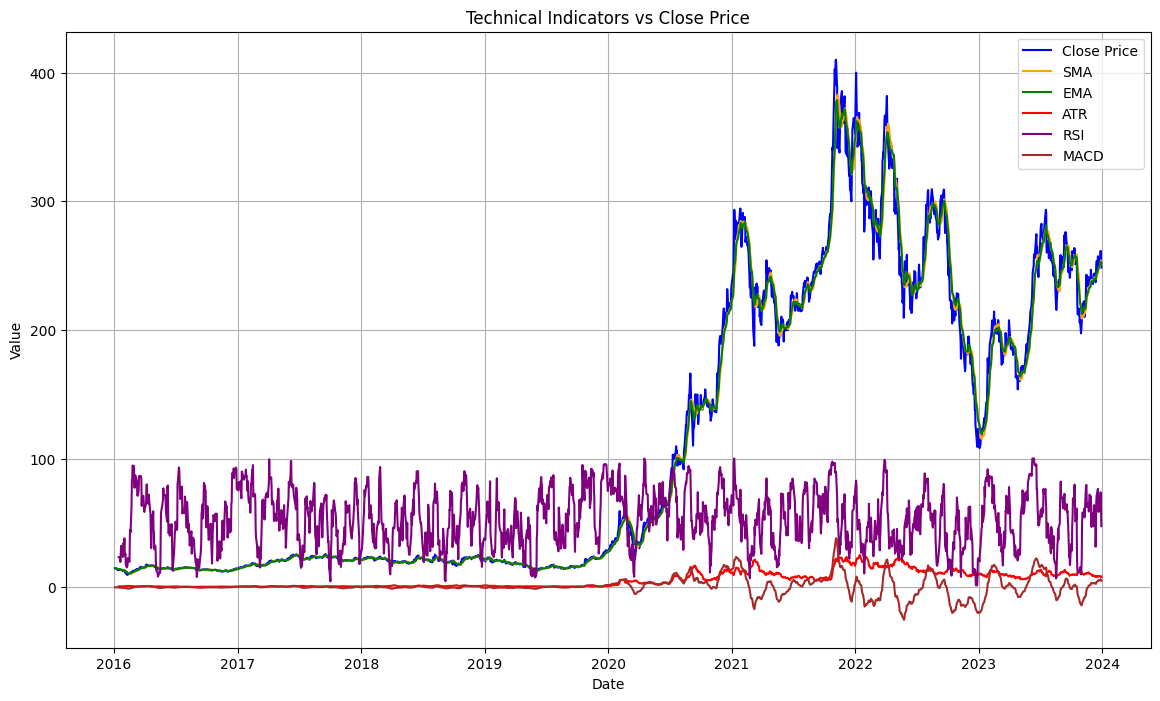

In [ ]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(14, 8))

# Plot Close price
plt.plot(stock_data.index, data_for_model['Close'], label='Close Price', color='blue')

# Plot SMA
plt.plot(data_for_model.index, data_for_model['SMA'], label='SMA', color='orange')

# Plot EMA
plt.plot(data_for_model.index, data_for_model['EMA'], label='EMA', color='green')

# Plot ATR
plt.plot(data_for_model.index, data_for_model['ATR'], label='ATR', color='red')

# Plot RSI
plt.plot(data_for_model.index, data_for_model['RSI'], label='RSI', color='purple')

# Plot MACD
plt.plot(data_for_model.index, data_for_model['MACD'], label='MACD', color='brown')

plt.title('Technical Indicators vs Close Price')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Check for missing values
missing_values = data_for_model.isnull().sum()
print("Missing Values:\n", missing_values)
data_for_model.head()

Missing Values:
 Close    0
SMA      9
EMA      0
ATR      9
RSI      9
MACD     0
dtype: int64


,Close,SMA,EMA,ATR,RSI,MACD
Date,,,,,,
2016-01-04,14.894000,NaN,14.894000,NaN,NaN,0.000000
2016-01-05,14.895333,NaN,14.894242,NaN,NaN,0.000106
2016-01-06,14.602667,NaN,14.841229,NaN,NaN,-0.023158
2016-01-07,14.376667,NaN,14.756763,NaN,NaN,-0.059150
2016-01-08,14.066667,NaN,14.631291,NaN,NaN,-0.111404


In [ ]:
# # Drop rows with missing values
# clean_data = data_for_model.dropna()

# # Verify if any missing values remain
# missing_values = clean_data.isnull().sum()
# print("Remaining missing values:\n", missing_values)


In [ ]:
# clean_data.head()

In [ ]:
data_for_model.loc[:, 'Next_Close'] = data_for_model['Close'].shift(-1)
data_for_model.head()

<ipython-input-64-94442687dc74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_model.loc[:, 'Next_Close'] = data_for_model['Close'].shift(-1)


,Close,SMA,EMA,ATR,RSI,MACD,Next_Close
Date,,,,,,,
2016-01-04,14.894000,NaN,14.894000,NaN,NaN,0.000000,14.895333
2016-01-05,14.895333,NaN,14.894242,NaN,NaN,0.000106,14.602667
2016-01-06,14.602667,NaN,14.841229,NaN,NaN,-0.023158,14.376667
2016-01-07,14.376667,NaN,14.756763,NaN,NaN,-0.059150,14.066667
2016-01-08,14.066667,NaN,14.631291,NaN,NaN,-0.111404,13.856667


In [ ]:
clean_data = data_for_model.copy()

In [ ]:
# Drop rows with missing values
clean_data.dropna(inplace=True)
missing_values = clean_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Close         0
SMA           0
EMA           0
ATR           0
RSI           0
MACD          0
Next_Close    0
dtype: int64


In [ ]:
#step 1: this is where we will split our dataset with slicing passing index
# Define the proportion of data for training
train_ratio = 0.8

# Calculate the number of samples for training
train_size = int(len(clean_data) * train_ratio)

# Split the dataset into train and test sets using integer indexing
train_df, test_df = clean_data.iloc[:train_size], clean_data.iloc[train_size:]

# Verify the shapes of the train and test dataframes
print("Train data shape:", train_df.shape)
print("Test data shape:", test_df.shape)


Train data shape: (1601, 7)
Test data shape: (401, 7)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

train_scaled_data = scaler.fit_transform(train_df.drop('Next_Close', axis=1))
test_scaled_data = scaler.fit_transform(test_df.drop('Next_Close', axis=1))

# Convert the scaled data back to a DataFrame
train_scaled_df = pd.DataFrame(train_scaled_data, columns=train_df.columns[:-1], index=train_df.index)
test_scaled_df = pd.DataFrame(test_scaled_data, columns=test_df.columns[:-1], index=test_df.index)

# Merge the scaled features with the target variable
train_scaled_df['Next_Close'] = train_df['Next_Close']
test_scaled_df['Next_Close'] = test_df['Next_Close']

train_df = train_scaled_df
test_df = test_scaled_df
# Assign scaled datasets to feature and label variables
# Split the scaled data into Features and Label
X_train = train_scaled_df.iloc[:, :-1].values
y_train = train_scaled_df.iloc[:, -1].values
X_test = test_scaled_df.iloc[:, :-1].values
y_test = test_scaled_df.iloc[:, -1].values

In [ ]:
# Import the model you want to use (for example, LinearRegression)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Step 3: Initialize the Linear Regression model
lr_model = LinearRegression()

# Step 4: Train the model
lr_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = lr_model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 22893.26276730525
Root Mean Squared Error (RMSE): 151.30519742330483
Mean Absolute Error (MAE): 137.12390787132685
R-squared (R2) Score: -9.97347634118212


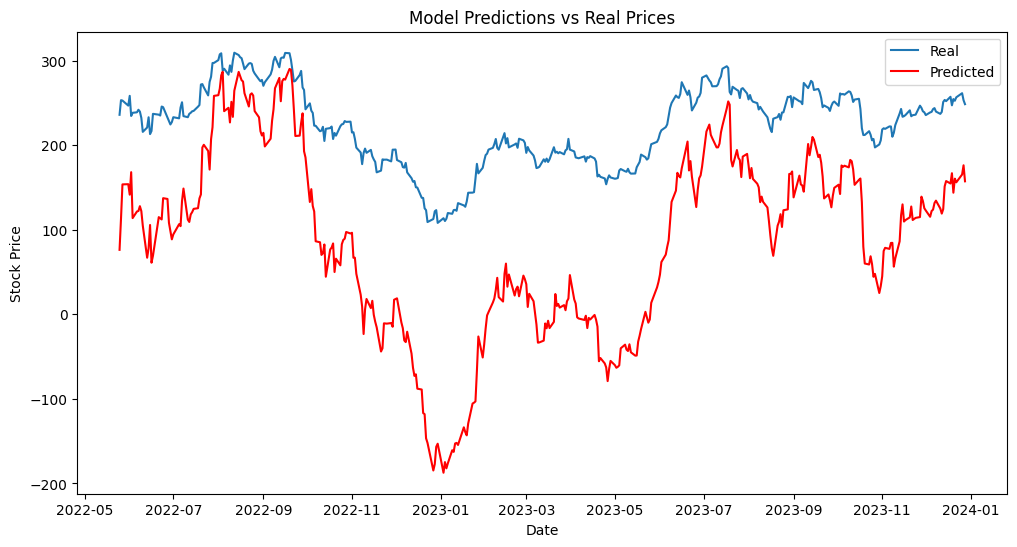

In [ ]:
# Plot final Predictions
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test_df.index, y_test, label='Real')
plt.plot(test_df.index, y_pred, color='red', label='Predicted')
plt.title('Model Predictions vs Real Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Step 3: Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Step 4: Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Step 5: Make predictions using Decision Tree model
y_pred_dt = dt_model.predict(X_test)

# Step 6: Evaluate the Decision Tree model
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Print evaluation metrics for Decision Tree
print("Decision Tree Model Evaluation:")
print("Mean Squared Error (MSE):", mse_dt)
print("Root Mean Squared Error (RMSE):", rmse_dt)
print("Mean Absolute Error (MAE):", mae_dt)
print("R-squared (R2) Score:", r2_dt)

Decision Tree Model Evaluation:
Mean Squared Error (MSE): 15475.431726461127
Root Mean Squared Error (RMSE): 124.4002882893007
Mean Absolute Error (MAE): 115.41606655501369
R-squared (R2) Score: -6.417871609040622


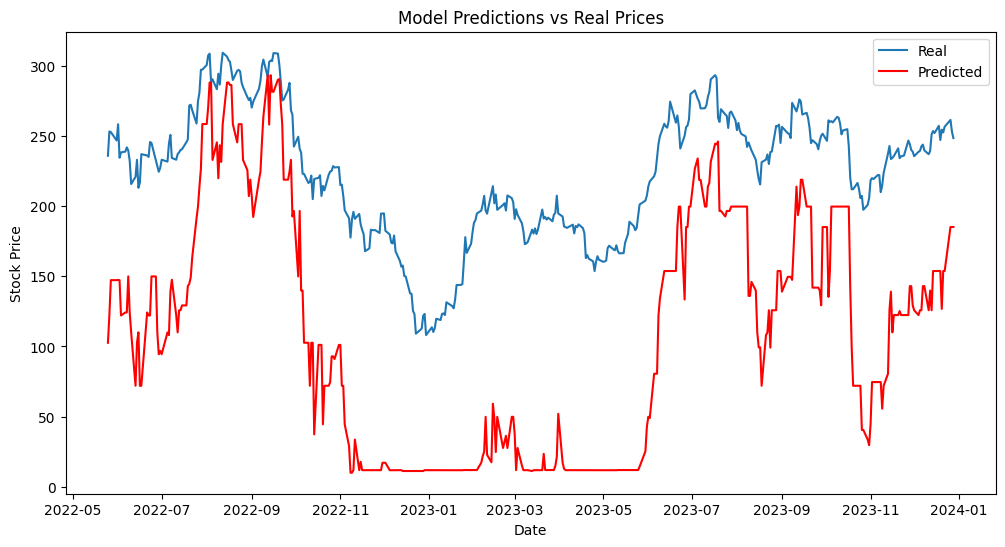

In [ ]:
# Plot final Predictions
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test_df.index, y_test, label='Real')
plt.plot(test_df.index, y_pred_dt, color='red', label='Predicted')
plt.title('Model Predictions vs Real Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'max_depth': [3, 5, 7, 9],  # Max depth of the tree
    'max_leaf_nodes': [None, 5, 10, 15]  # Max number of leaf nodes
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid=param_grid, cv=5)

# Fit the GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Best parameters found
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred_dt = best_model.predict(X_test)

# Evaluate the Decision Tree model with best parameters
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Print evaluation metrics for Decision Tree
print("Decision Tree Model Evaluation with Parameter Tuning:")
print("Mean Squared Error (MSE):", mse_dt)
print("Root Mean Squared Error (RMSE):", rmse_dt)
print("Mean Absolute Error (MAE):", mae_dt)
print("R-squared (R2) Score:", r2_dt)


Best Parameters: {'max_depth': 9, 'max_leaf_nodes': None}
Decision Tree Model Evaluation with Parameter Tuning:
Mean Squared Error (MSE): 15336.801659883515
Root Mean Squared Error (RMSE): 123.8418413133603
Mean Absolute Error (MAE): 114.74049552076421
R-squared (R2) Score: -6.35142176433179


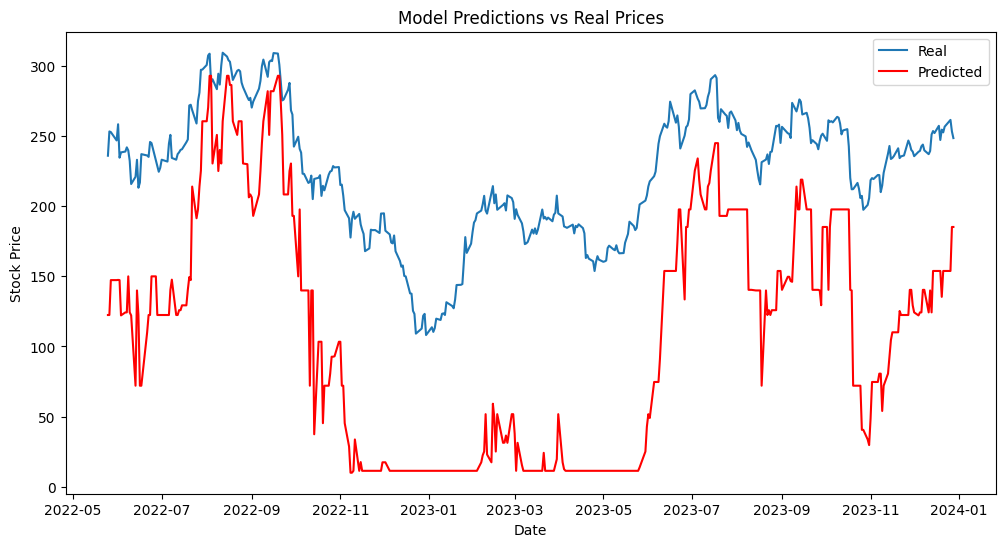

In [ ]:
# Plot final Predictions
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test_df.index, y_test, label='Real')
plt.plot(test_df.index, y_pred_dt, color='red', label='Predicted')
plt.title('Model Predictions vs Real Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
# Step 3: Initialize the Decision Tree Regressor model with specified parameters
max_depth = 5
dt_model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

# Step 4: Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Step 5: Make predictions using Decision Tree model
y_pred_dt = dt_model.predict(X_test)

# Step 6: Evaluate the Decision Tree model
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Print evaluation metrics for Decision Tree
print("Decision Tree Model Evaluation:")
print("Mean Squared Error (MSE):", mse_dt)
print("Root Mean Squared Error (RMSE):", rmse_dt)
print("Mean Absolute Error (MAE):", mae_dt)
print("R-squared (R2) Score:", r2_dt)

Decision Tree Model Evaluation:
Mean Squared Error (MSE): 15378.454919122554
Root Mean Squared Error (RMSE): 124.00989847235
Mean Absolute Error (MAE): 115.45927988052301
R-squared (R2) Score: -6.371387509688345


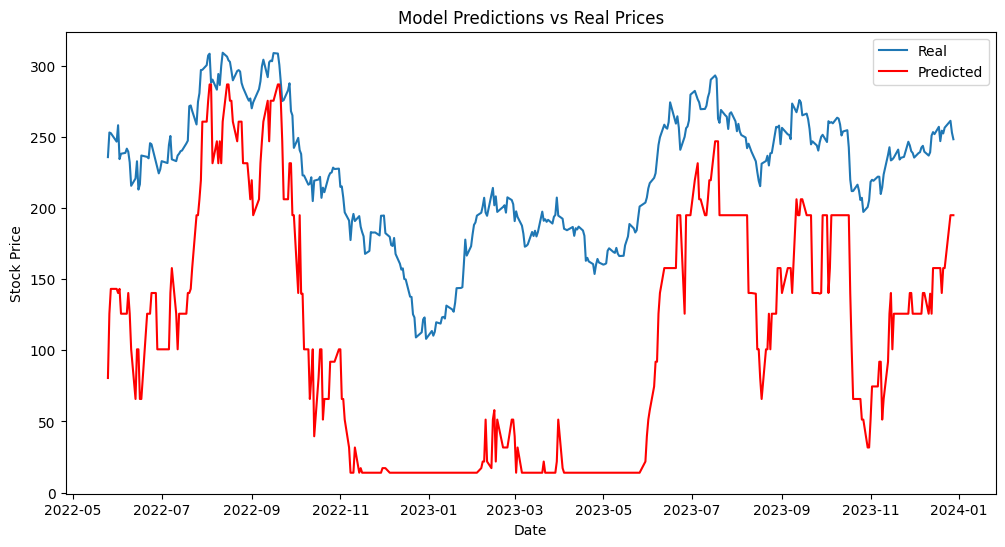

In [ ]:
# Plot final Predictions
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test_df.index, y_test, label='Real')
plt.plot(test_df.index, y_pred_dt, color='red', label='Predicted')
plt.title('Model Predictions vs Real Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Step 7: Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 8: Train the Random Forest model
rf_model.fit(X_train, y_train)

# Step 9: Make predictions using Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Step 10: Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics for Random Forest
print("\nRandom Forest Model Evaluation:")
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("R-squared (R2) Score:", r2_rf)


Random Forest Model Evaluation:
Mean Squared Error (MSE): 15301.317625241103
Root Mean Squared Error (RMSE): 123.69849483821984
Mean Absolute Error (MAE): 115.50419514425377
R-squared (R2) Score: -6.334413126524414


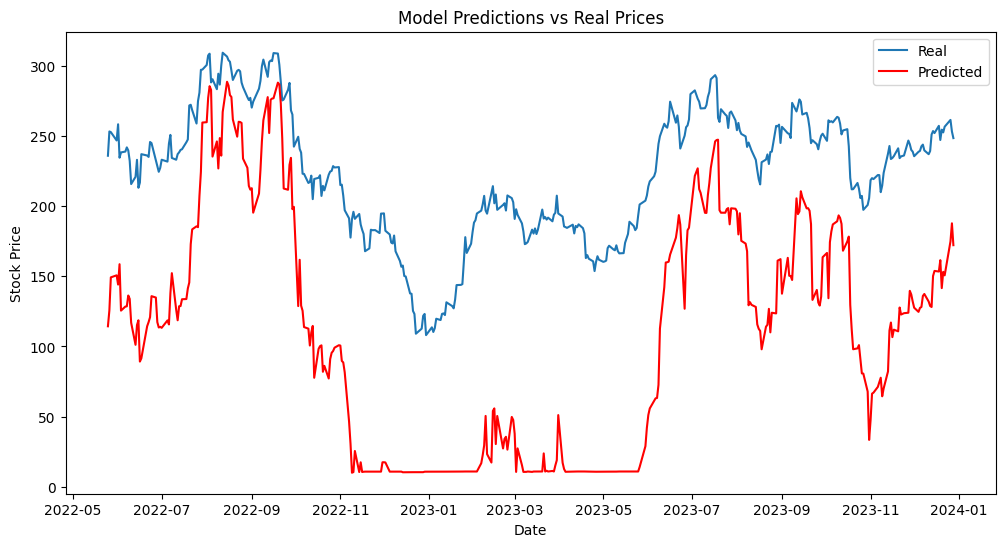

In [ ]:
# Plot final Predictions
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test_df.index, y_test, label='Real')
plt.plot(test_df.index, y_pred_rf, color='red', label='Predicted')
plt.title('Model Predictions vs Real Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
# Step 7: Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Step 8: Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 5, 10],        # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Step 9: Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 10: Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Step 11: Make predictions using the best estimator
y_pred_rf_tuned = best_estimator.predict(X_test)

# Step 12: Evaluate the Random Forest model with tuned hyperparameters
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
rmse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned, squared=False)
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

# Print evaluation metrics for Random Forest with tuned hyperparameters
print("\nRandom Forest Model Evaluation with Parameter Tuning:")
print("Mean Squared Error (MSE):", mse_rf_tuned)
print("Root Mean Squared Error (RMSE):", rmse_rf_tuned)
print("Mean Absolute Error (MAE):", mae_rf_tuned)
print("R-squared (R2) Score:", r2_rf_tuned)
print("Best Parameters:", best_params)


Random Forest Model Evaluation with Parameter Tuning:
Mean Squared Error (MSE): 15210.601499205122
Root Mean Squared Error (RMSE): 123.33126732181553
Mean Absolute Error (MAE): 115.19670899945109
R-squared (R2) Score: -6.290929972858733
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}


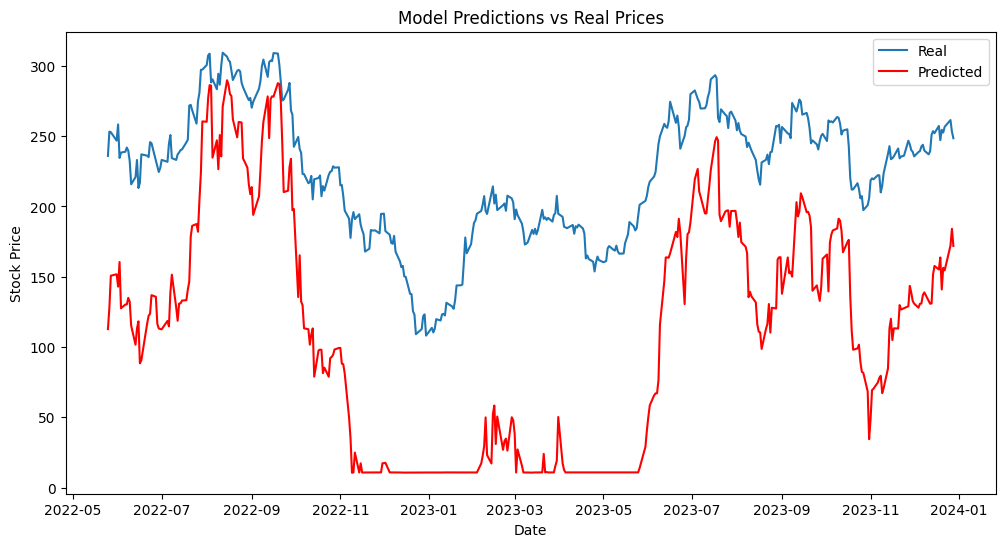

In [ ]:
# Plot final Predictions
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test_df.index, y_test, label='Real')
plt.plot(test_df.index, y_pred_rf_tuned, color='red', label='Predicted')
plt.title('Model Predictions vs Real Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Step 3: Initialize the XGBoost Regressor model
xgb_model = xgb.XGBRegressor(random_state=42)

# Step 4: Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Step 5: Make predictions using XGBoost model
y_pred_xgb = xgb_model.predict(X_test)

# Step 6: Evaluate the XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print evaluation metrics for XGBoost
print("XGBoost Model Evaluation:")
print("Mean Squared Error (MSE):", mse_xgb)
print("Root Mean Squared Error (RMSE):", rmse_xgb)
print("Mean Absolute Error (MAE):", mae_xgb)
print("R-squared (R2) Score:", r2_xgb)

In [ ]:
# Plot final Predictions
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test_df.index, y_test, label='Real')
plt.plot(test_df.index, y_pred_xgb, color='red', label='Predicted')
plt.title('Model Predictions vs Real Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Initialize XGBoost model with best parameters
xgb_model_best = xgb.XGBRegressor(random_state=42, **best_params)

# Train the model with best parameters
xgb_model_best.fit(X_train, y_train)

# Make predictions
y_pred_xgb_best = xgb_model_best.predict(X_test)

# Evaluate the model
mse_xgb_best = mean_squared_error(y_test, y_pred_xgb_best)
rmse_xgb_best = mean_squared_error(y_test, y_pred_xgb_best, squared=False)
mae_xgb_best = mean_absolute_error(y_test, y_pred_xgb_best)
r2_xgb_best = r2_score(y_test, y_pred_xgb_best)

# Print evaluation metrics for XGBoost with best parameters
print("XGBoost Model Evaluation with Best Parameters:")
print("Mean Squared Error (MSE):", mse_xgb_best)
print("Root Mean Squared Error (RMSE):", rmse_xgb_best)
print("Mean Absolute Error (MAE):", mae_xgb_best)
print("R-squared (R2) Score:", r2_xgb_best)


XGBoost Model Evaluation with Best Parameters:
Mean Squared Error (MSE): 15890.68178452974
Root Mean Squared Error (RMSE): 126.0582475863033
Mean Absolute Error (MAE): 118.77369500633488
R-squared (R2) Score: -6.6169143027014865


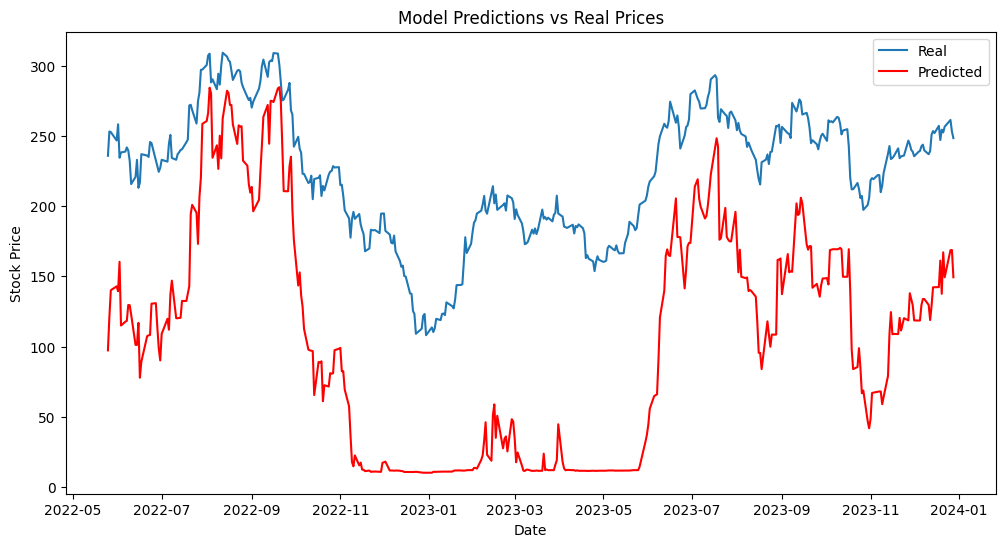

In [ ]:
# Plot final Predictions
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test_df.index, y_test, label='Real')
plt.plot(test_df.index, y_pred_xgb_best, color='red', label='Predicted')
plt.title('Model Predictions vs Real Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Combine X_train and y_train
train_data = y_train

# Combine X_test and y_test
test_data = y_test

# Step 1: Fit the ARIMA model
order = (0, 1, 0)  # Adjust the order of the ARIMA model
model_arima = ARIMA(train_data, order=order)
model_arima_fit = model_arima.fit()

# Step 2: Make predictions
predictions_arima = model_arima_fit.forecast(steps=len(test_data))

# Step 3: Evaluate the model
mse_arima = mean_squared_error(test_data, predictions_arima)
rmse_arima = np.sqrt(mse_arima)
mae_arima = mean_absolute_error(test_data, predictions_arima)

# Calculate R-squared manually
mean_y = np.mean(test_data)
sst = np.sum((test_data - mean_y)**2)
ssr = np.sum((predictions_arima - test_data)**2)
r2_arima = 1 - (ssr / sst)

# Print evaluation metrics
print("ARIMA Model Evaluation:")
print("Mean Squared Error (MSE):", mse_arima)
print("Root Mean Squared Error (RMSE):", rmse_arima)
print("Mean Absolute Error (MAE):", mae_arima)
print("R-squared (R2) Score:", r2_arima)


ARIMA Model Evaluation:
Mean Squared Error (MSE): 2105.6649671103187
Root Mean Squared Error (RMSE): 45.887525179620646
Mean Absolute Error (MAE): 38.23457115725092
R-squared (R2) Score: -0.009312867890563181


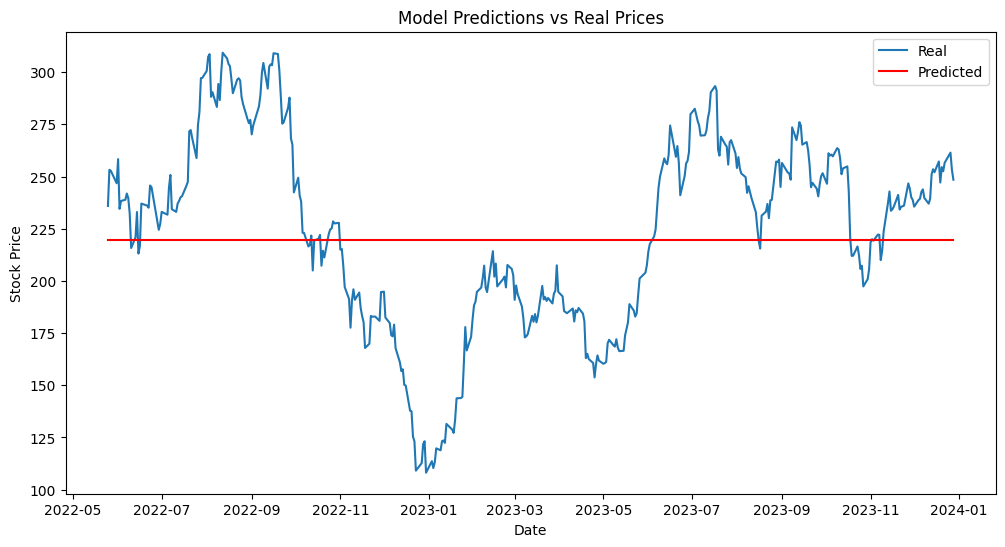

In [ ]:
# Plot final Predictions
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test_df.index, y_test, label='Real')
plt.plot(test_df.index, predictions_arima, color='red', label='Predicted')
plt.title('Model Predictions vs Real Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
# Reshape the input data for LSTM (samples, time steps, features)
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Initialize the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(1, X_train.shape[1])))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(units=1))

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32)

# Make predictions using LSTM model
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Calculate evaluation metrics
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = mean_squared_error(y_test, y_pred_lstm, squared=False)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

# Print evaluation metrics including R2
print("LSTM Model Evaluation:")
print("Mean Squared Error (MSE):", mse_lstm)
print("Root Mean Squared Error (RMSE):", rmse_lstm)
print("Mean Absolute Error (MAE):", mae_lstm)
print("R-squared (R2) Score:", r2_lstm)

Epoch 1/100
51/51 [==============================] - 5s 4ms/step - loss: 19162.0508
Epoch 2/100
51/51 [==============================] - 0s 4ms/step - loss: 18583.6113
Epoch 3/100
51/51 [==============================] - 0s 4ms/step - loss: 17756.7852
Epoch 4/100
51/51 [==============================] - 0s 4ms/step - loss: 17255.9180
Epoch 5/100
51/51 [==============================] - 0s 3ms/step - loss: 16854.0645
Epoch 6/100
51/51 [==============================] - 0s 3ms/step - loss: 16495.1035
Epoch 7/100
51/51 [==============================] - 0s 4ms/step - loss: 16115.9854
Epoch 8/100
51/51 [==============================] - 0s 4ms/step - loss: 15732.2881
Epoch 9/100
51/51 [==============================] - 0s 3ms/step - loss: 15370.4287
Epoch 10/100
51/51 [==============================] - 0s 4ms/step - loss: 15067.4639
Epoch 11/100
51/51 [==============================] - 0s 3ms/step - loss: 14804.9844
Epoch 12/100
51/51 [==============================] - 0s 4ms/step - loss: 

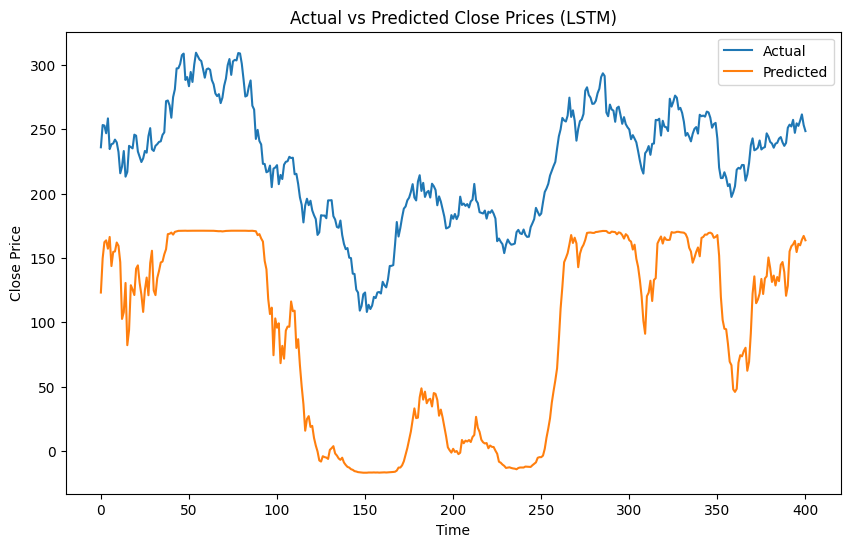

In [ ]:
# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_lstm, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices (LSTM)')
plt.legend()
plt.show()